# BioID Results

This jupyter notebook summarises the results of the active appearance models which were trained using the *menpo* Python Package.  For more information regarding the training of these models please refer to:

1. Section 4 of the Review Paper
2. The Active Appearance Model base class contained within *aam.py*
3. The holisitc AAM and patch AAM models described within *bioid_aam_hol.py* and *bioid_aam_patch.py*

This notebook will contained the cumulative error distribution curves produced by the models as well as a selection from literature.

-------------------------------------------------------------------------------------------------------------------------

## Resource Utilisation

| Model | Time (hh:mm:ss)   |  Avg # CPUs Used |  Memory Used (GB) |
|-------|-------------------|------------------|-------------------|
|  hAAM |     00:03:06      |       4.54       |        1.0        |
|  pAAM |     00:06:12      |       4.70       |        1.1        |
-------------------------------------------------------------------------------------------------------------------------
## Test Set

A brief description of the test set used during the experiment. Note that the same test set was used for both holistic and patch experiments.

In [1]:
import os
with open('bioid_aam_patch_testset.txt', 'r') as f:
    test_set_filenames = f.read().split('\n')

print("The test set comprised of %i images\n" % len(test_set_filenames))
print("Listing the first 10 images:")

# Print summary
test_set_filenames = [os.path.basename(filename) for filename in test_set_filenames]
print("\t".join(test_set_filenames[:10]) + "...")

The test set comprised of 457 images

Listing the first 10 images:
BioID_0566.pgm	BioID_1101.pgm	BioID_1473.pgm	BioID_1177.pgm	BioID_1009.pgm	BioID_0433.pgm	BioID_0855.pgm	BioID_1491.pgm	BioID_1032.pgm	BioID_1079.pgm...


## Cumulative Error Distribution Curves

The following chart shows the normalised error distribution as produced by the holisitic and patch AAMs vs that described by Cristinacce & Cootes in 2006<sup>1</sup>

1. Cristinacce, D., & Cootes, T. F. (2006). Feature Detection and Tracking with Constrained Local Models. Procedings of the British Machine Vision Conference 2006, 95.1-95.10. http://doi.org/10.5244/C.20.95

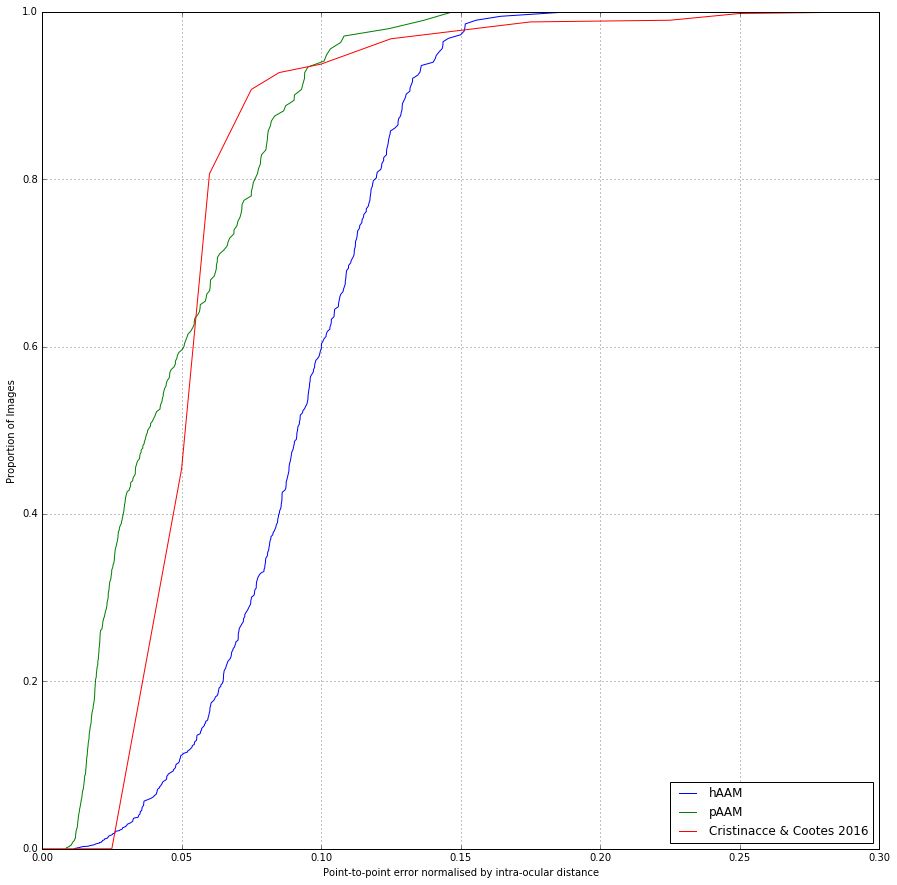

In [4]:
import numpy as np

# Import and configure matplotlib
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 15)
import matplotlib.pyplot as plt


# These files contains the CED data from experimentation & literature
FILES = ['bioid_aam_hol.npy', 'bioid_aam_patch.npy', 'bioid_cristinacce_clm.npy']
LABELS = ['hAAM', 'pAAM', 'Cristinacce & Cootes 2016']

for filename, label in zip(FILES, LABELS):
    
    # Load the data
    data = np.load(filename)
    
    # Normalise
    data[1] /= np.max(data[1])
    
    # Plot
    plt.plot(data[0], data[1], label=label)


# Add details to plot
plt.legend(loc='lower right');
plt.grid();
plt.xlabel('Point-to-point error normalised by intra-ocular distance');
plt.ylabel('Proportion of Images');